In [179]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Time for R**

In [273]:
cadata = sc.read("datasets/masked_cellcounts.h5ad")

**Run the results of Genefu**

In [274]:
er_her2 = pd.read_csv('R_time/scmod1.csv')
er_her2 = er_her2.rename(columns={er_her2.columns[0]: 'cellID'})
er_her2.head()

,cellID,ER..HER2.,HER2.,ER..HER2..1
0,BC01_02,0.036387,0.051221,0.912392
1,BC01_03,0.006644,0.000534,0.992822
2,BC01_04,0.001879,0.076321,0.921800
3,BC01_05,0.000413,0.001369,0.998218
4,BC01_06,0.030913,0.006585,0.962502


In [275]:
# Check for missing cellIDs in cadata.obs_names
missing_cellIDs = set(cadata.obs_names) -  set(er_her2.cellID)

# Create a new DataFrame for the missing cellIDs
missing_rows = pd.DataFrame({'cellID': list(missing_cellIDs), er_her2.columns[1]: 0, er_her2.columns[2]: 0, er_her2.columns[3]: 0})

# Concatenate the missing rows with the original DataFrame
er_her2 = pd.concat([er_her2, missing_rows])

# Set the 'cellID' column as the index
er_her2 = er_her2.set_index('cellID')

# Sort the DataFrame by index
er_her2 = er_her2.sort_index()


In [276]:
er_her2.shape

(509, 3)

In [277]:
cadata.obs['ER-/HER2-'] = list(er_her2[er_her2.columns[0]])
cadata.obs['HER2+'] = list(er_her2[er_her2.columns[1]])
cadata.obs['ER+/HER2-'] = list(er_her2[er_her2.columns[2]])

In [278]:
piechart_df = pd.DataFrame({
    'tumor_groups': cadata.obs['tumor_groups'],
    'ER-/HER2-': cadata.obs['ER-/HER2-'],
    'HER2+': cadata.obs['HER2+'],
   'ER+/HER2-': cadata.obs['ER+/HER2-']
})
piechart_df.head()

,tumor_groups,ER-/HER2-,HER2+,ER+/HER2-
BC01_02,BC01 Luminal-A,0.036387,0.051221,0.912392
BC01_03,BC01 Luminal-A,0.006644,0.000534,0.992822
BC01_04,BC01 Luminal-A,0.001879,0.076321,0.921800
BC01_05,BC01 Luminal-A,0.000413,0.001369,0.998218
BC01_06,BC01 Luminal-A,0.030913,0.006585,0.962502


In [279]:
grouped_df = piechart_df.groupby('tumor_groups').sum()
grouped_df.head(13)

,ER-/HER2-,HER2+,ER+/HER2-
tumor_groups,,,
BC01 Luminal-A,1.207166,1.002131,17.790703
BC02 Luminal-A,7.084637,0.804836,45.110527
BC03 Luminal-B,0.752215,0.808470,6.439314
BC03LN Luminal-B,2.110066,1.638932,13.251002
BC04 HER2,4.195318,12.689606,28.115076
BC05 HER2\n(Herceptin),2.707727,27.825790,44.466483
BC06 HER2,1.383798,0.284131,6.332072
BC07 TNBC,0.020068,24.097508,0.882425
BC07LN TNBC,1.386867,23.031648,2.581486


In [280]:
grouped_df.columns

Index(['ER-/HER2-', 'HER2+', 'ER+/HER2-'], dtype='object')

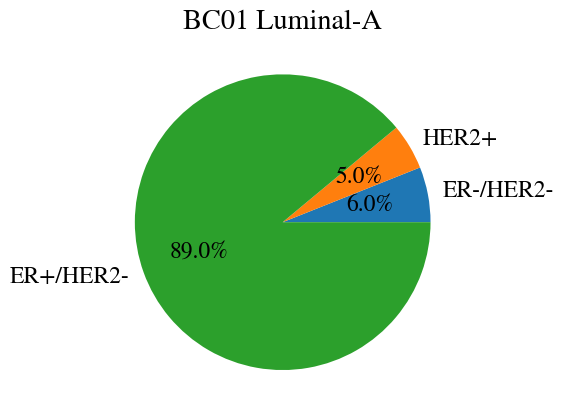

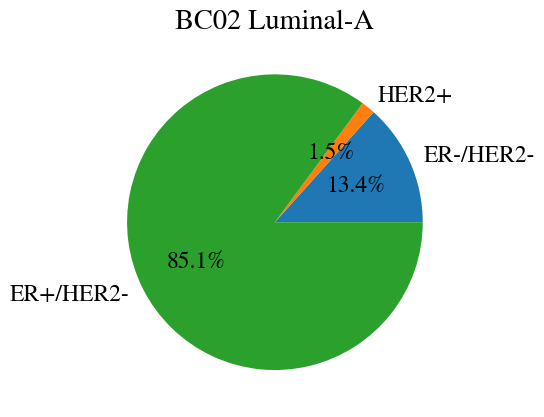

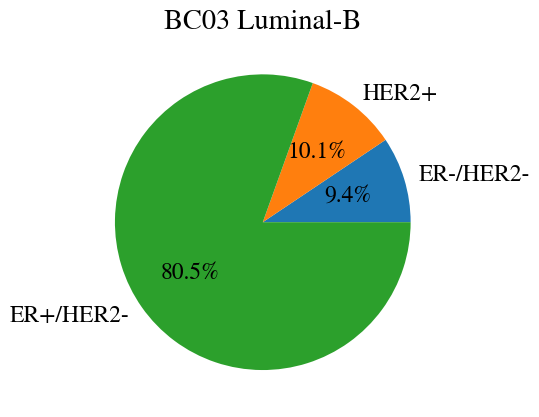

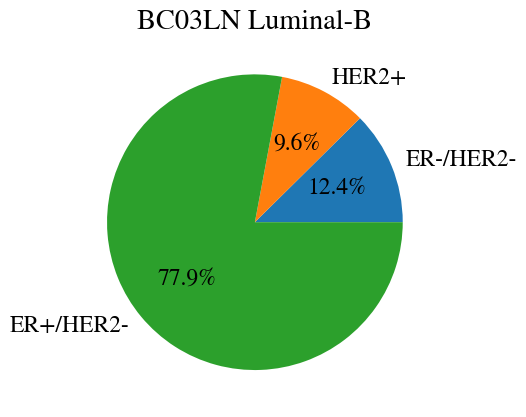

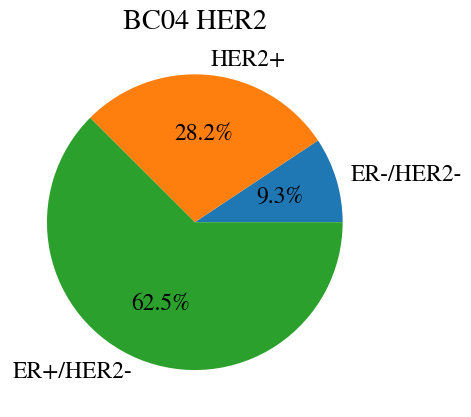

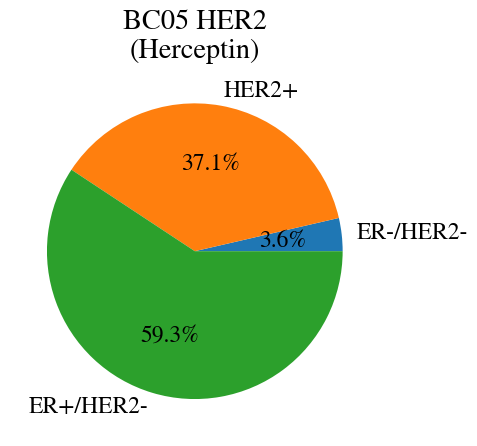

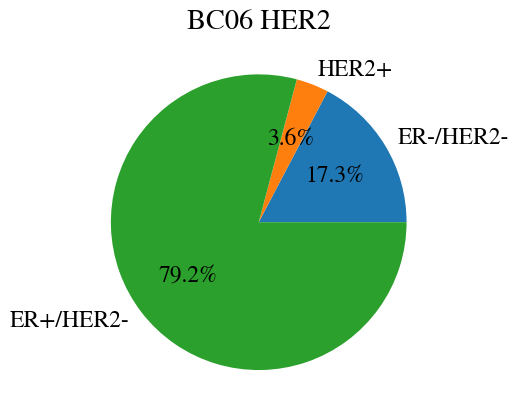

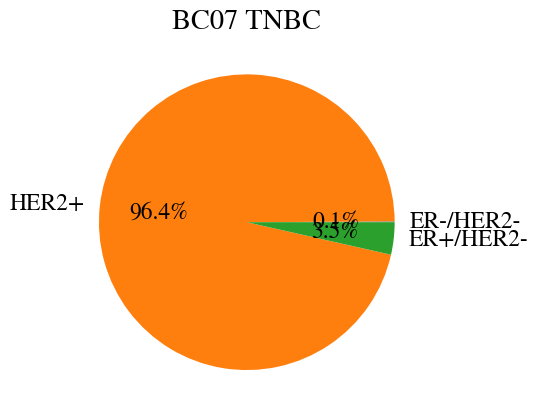

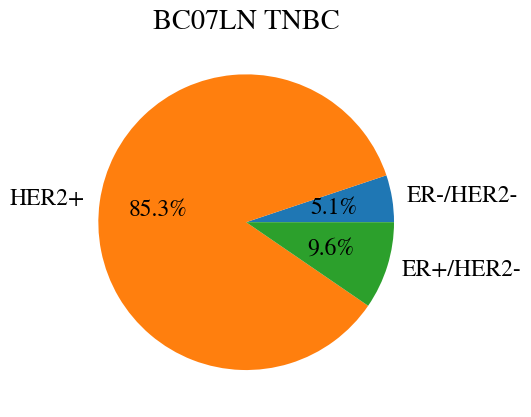

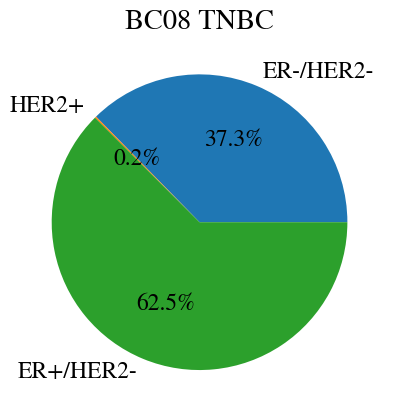

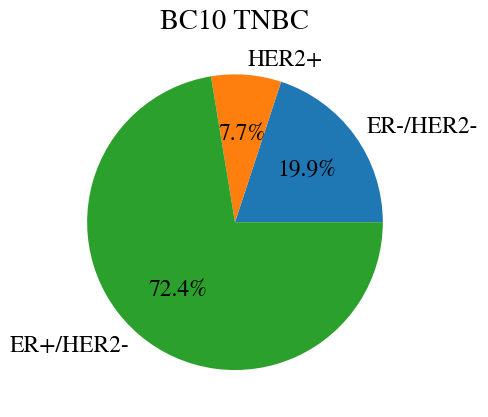

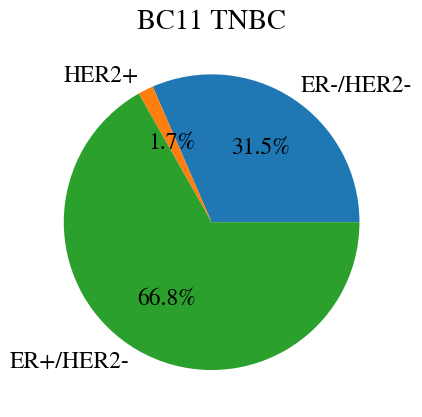

In [281]:
# Iterate over rows in the grouped_df DataFrame
for row in grouped_df.iterrows():
    # Get the tumor group and values for the current row
    tumor_group = row[0]
    values = row[1].values
    if values.sum() == 0:
        continue

    # Create a pie chart for the current row
    plt.figure()
    plt.pie(values, labels=grouped_df.columns, autopct='%1.1f%%')
    plt.title(tumor_group)

plt.show()